# Default of Credit Card Clients Dataset

# Introduction

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

  This case of customer default payments and compares the predictive accuracy of probability of default among six data mining methods.The six data mining techniques,to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. When two or more independent variables are used to predict or explain the outcome of the dependent variable, this is known as multiple regression.

### Problem Statement :

I aim to solve following problem; 
>1) Which components are most important of default?<br>
2) What is the relationship  between default and other variables?<br>
3) Which customers are likely to default?<br>
4) Is it possible we're imagining relationships when they're not really that strong?<br>

  Success for this project to take clear and safe step of the exertion of machine learning, data wrangling, exploratory data analysis, model selection.
  This project will help in risk management. As a result project shows banks make most of their revenues from their credit client bills, and very important to know credible or not credible clients otherwise defaulting causes huge losses to the bank.
  

## Dataset

### Description of the raw dataset
There are 25 variables:<br>
    1. **ID:** ID of each client<br>
    2. **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplemantary credit)<br>
    3. **SEX:** Gender (1=male, 2=female)<br>
    4. **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
    5. **MARRIAGE:** Marital status (1=married, 2=single, 3=others)<br>
    6. **AGE:** Age in years<br>
    7. **PAY_1:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
    8. **PAY_2:** Repayment status in August, 2005 (scale same as above)<br>
    9. **PAY_3:** Repayment status in July, 2005 (scale same as above)<br>
    10. **PAY_4:** Repayment status in June, 2005 (scale same as above)<br>
    11. **PAY_5:** Repayment status in May, 2005 (scale same as above)<br>
    12. **PAY_6:** Repayment status in April, 2005 (scale same as above)<br>
    13. **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)<br>
    14. **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)<br>
    15. **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)<br>
    16. **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)<br>
    17. **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)<br>
    18. **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)<br>
    19. **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)<br>
    20. **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)<br>
    21. **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)<br>
    22. **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)<br>
    23. **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)<br>
    24. **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)<br>
    25. **DEFAULT(default.payment.next.month):** Default payment (1=yes, 0=no)<br>


#  Capstone2 

##  Preliminaries

### Step 1: <font color=green> Import Libraries </font>

**Matplotlib** - This is Python's basic plotting library.
To use the pyplot and dates function collections from matplotlib throughout this case study so important these two specific libraries. Also, include the line **'%matplotlib inline'** so that graphs are easily included in notebook. 


**import matplotlib as mpl**

**mpl.rcParams['figure.figsize'] = (20,5)**

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['figure.figsize']=(10,5) #this code makes a chart size!


## Load dataset

In [2]:
dataframe_raw=pd.read_csv('UCI_Credit_Card.csv', header=0)



### Read Data


In [3]:
dataframe_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Describe

In [4]:
dataframe_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Let's read table what data tell us to know important. <br>
**Count** number shows 30,000 prominent credit card clients.<br>
**Credit card limit** average value is 167,484 that is the huge range of **LIMIT_BAL**. This is might cause of effect problem.<br>
**Standard deviation** is larger than normal, and **max** value is 1M.<br>
**Education** average is 1.85 means most of the clients graduate from school and university.<br>
**Marriage** average is 1.55 means distinct half married or single, and less frequent other statues.<br>
**Age** age is 35.5 years, and standard deviation of 9.2.<br>
**BILL_ATM** has neagative variables that means the bank provides a credit system for bill payment.<br>
**Default payment** the means of 0.221 that tells there are 22.1% of credit card contracts that will default next month. Let's verify this value.<br>

# Data Wrangling

Data Wrangling refers to the process of collecting raw data, handling missing values and collecting information about various variables, mapping it, and storing it in a useful format.This will help us quicken the process of decision making, and thus get better insights in less time.


## Education
<font color=green>Change data in education</font> unknown to 'Other'

In [5]:
Unknown = (dataframe_raw.EDUCATION == 5) | (dataframe_raw.EDUCATION == 6) | (dataframe_raw.EDUCATION==0)
dataframe_raw.loc[Unknown, 'EDUCATION'] = 2
print(dataframe_raw.EDUCATION)

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64


<font color=green> Check Education each variable of number.</font>. Most customer graduate from university.

In [6]:
dataframe_raw['EDUCATION'].value_counts()

2    14375
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

## Marriage
<font color=green>Change data in marriage</font> unknown to 'Other'

In [7]:
Unknown = (dataframe_raw.MARRIAGE == 0)
dataframe_raw.loc[Unknown, 'MARRIAGE'] = 2
print(dataframe_raw.MARRIAGE)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64


<font color=green> Check Marriage each value of number</font>. Highest number for married client. 

In [8]:
dataframe_raw['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

<font color=green>Check each value of each categorical variable</font>

In [9]:
print('SEX ' + str(sorted(dataframe_raw['SEX'].unique())))
print('EDUCATION ' + str(sorted(dataframe_raw['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(dataframe_raw['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(dataframe_raw['PAY_0'].unique())))
print('default.payment.next.month ' + str(sorted(dataframe_raw['default.payment.next.month'].unique())))

SEX [1, 2]
EDUCATION [1, 2, 3, 4]
MARRIAGE [1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month [0, 1]


<font color=green> Change column name</font> 'default.payment.next.month' is better to name it 'DEFAULT'.

In [10]:
dataframe_raw = dataframe_raw.rename(columns={'default.payment.next.month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})


<font color=green>Checking the all columns name</font>

In [11]:
dataframe_raw.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

<font color=green>Checking the data size</font> with the <font color=green>shape</font> attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, then Y.shape is (n,m).

In [12]:
dataframe_raw.shape

(30000, 25)

<font color=green>Checking the amount of missing data.</font>

In [13]:
dataframe_raw.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

Perfect, dataset looking doesn't have missing information, but one more step to sure dataset ready to analyst. <font color=green>Checking the datatypes</font> of the variables to verify dataset doesn't have any other missing value.

In [14]:
dataframe_raw.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

All variable has 64 value. Data types looks correct.<br>
  

###  Data Cleansing

Value 0, 5, 6 in EDUCATION all been replaced with 4 to represent category of other.<br>
Value 0 in MARRIAGE all been replaced with 3 to represent category of other.<br>
Column PAY_0 renamed to PAY_1.<br>
Column default.payment.next.month renamed to DEFAULT. Data ready for further analysis.<br>

# Exploratory Data Analysis


<font color=green>Check more detail for each value.</font>EDA simple bit of exploratory data can show analysts whether there is a trend or major difference between two or more data sets and how these affect the probability of a customer defaulting in the next month, by making variables like Age, Sex etc. affect the change of defaulting, which are relatively hard for to analyze as a whole. Aditional,finding a correlation between various variables through plots.

## Explore Default Quantity and Percentage

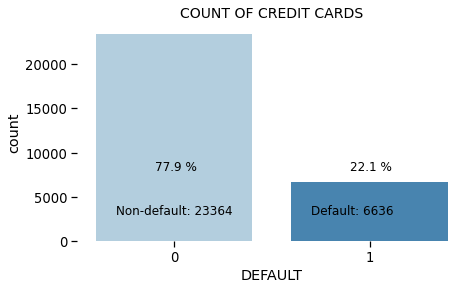

In [15]:
# The frequency of defaults
yes = dataframe_raw.DEFAULT.sum()
no = len(dataframe_raw)-yes

# Percentage
yes_perc = round(yes/len(dataframe_raw)*100, 1)
no_perc = round(no/len(dataframe_raw)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('DEFAULT',data=dataframe_raw, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

From this sample of 30,000 credit card holders, there are 6,636 default credit cards; that is, the proportion of default in the data is 22,1%.

### Explore SEX DATA with Default

Let's check each variable quantity of 'SEX' and percentage.

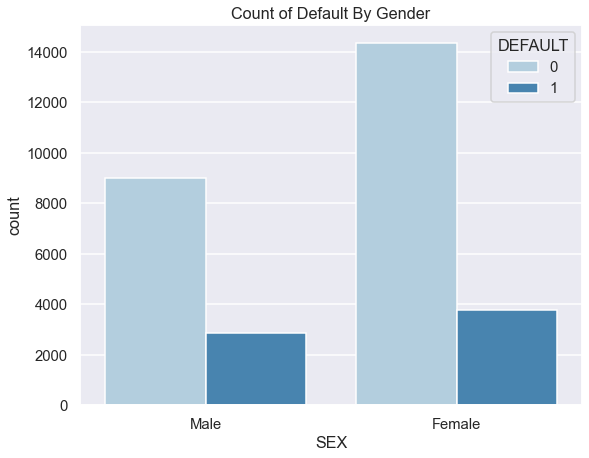

DEFAULT,0,1,percentage
SEX,,,
1,9015,2873,24.17
2,14349,3763,20.78


In [16]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.9)

sex = sns.countplot(x='SEX', hue='DEFAULT', data=dataframe_raw, palette ='Blues')
sex.set_xticklabels(['Male','Female'])
plt.title('Count of Default By Gender')
plt.show()
#create table percentage of default by gender
s_df = dataframe_raw.groupby(['SEX','DEFAULT'])['DEFAULT'].count().unstack()
s_df['percentage'] = round((s_df[1]/(s_df[0]+s_df[1]))*100,2)
s_df

What can we tell Male percentage higher than femail. From the bar chart, it's evident that males have a higher probability of defaulting than females, since 24% of males default compared to 20% of females.
And a higher number of females have defaulted (3763) than males (2873) in the default of previous months.
Let's look at the credit limit.

(47.70879689062111,
 4.944678999412044e-12,
 1,
 array([[ 9258.3744,  2629.6256],
        [14105.6256,  4006.3744]]))

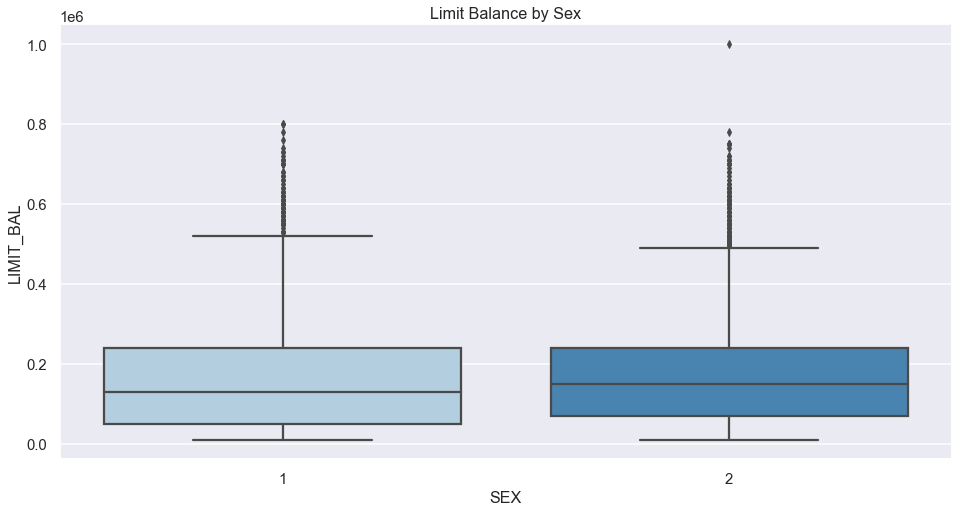

In [17]:
from scipy import stats
plt.figure(figsize=(16,8))
sns.boxplot(x= 'SEX', y='LIMIT_BAL',data=dataframe_raw, palette ='Blues') 

plt.title('Limit Balance by Sex')
#Chi square test 
stats.chi2_contingency(pd.crosstab(dataframe_raw['SEX'],dataframe_raw['DEFAULT']))

Male's credit limit of average lower than female average.Data tells male clients higher tend to default.<br> *Chi Test result of statistic 47.71.<br> 
*P-value 4.94e^-12

### Explore Education with Default Data
Let's show Education level and Default quantity with bar chart.

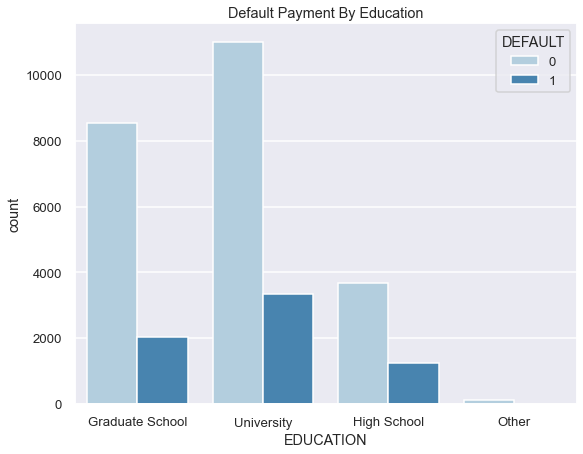

DEFAULT,0,1,percentage
EDUCATION,,,
1,8549,2036,19.23
2,11019,3356,23.35
3,3680,1237,25.16
4,116,7,5.69


In [18]:
#create bar chart
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=dataframe_raw, palette ='Blues')
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.title('Default Payment By Education')
plt.show()
#create table percentage of default by education
ed_df = dataframe_raw.groupby(['EDUCATION','DEFAULT'])['DEFAULT'].count().unstack()
ed_df['percentage'] = round((ed_df[1]/(ed_df[0]+ed_df[1]))*100,2)
ed_df

From the bar chart and table, high level of education tends to reduce the probability of default. This makes sense because lower education may mean a lower salary and limit. Let's check if our assumption is correct.

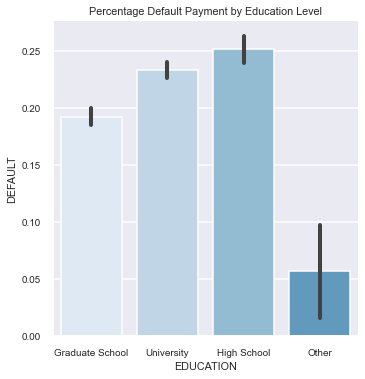

In [19]:
sns.set(rc={'figure.figsize':(9,9)})
sns.set_context("talk", font_scale=0.6)
sns.set_palette("Blues")

# Create a bar plot of interest in math, separated percentage of default by education
edu=sns.catplot(x="EDUCATION", y="DEFAULT",
            data=dataframe_raw, kind="bar")
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.title('Percentage Default Payment by Education Level')
# Show plot
plt.show()

In [20]:
dataframe_raw.groupby(['EDUCATION'])['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147545.878261
3    126550.270490
4    220894.308943
Name: LIMIT_BAL, dtype: float64

Text(0.5, 1.0, 'Credit Limit ')

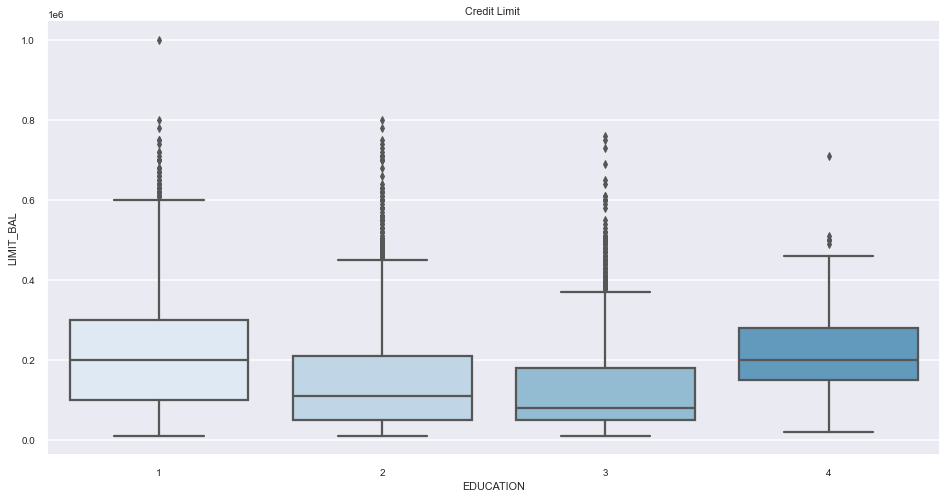

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(x= 'EDUCATION', y='LIMIT_BAL',data=dataframe_raw) 
plt.title("Credit Limit ")

Our hypothesis was perfect customers with graduate school degrees have the highest limits whereas high school pass outs have the least amongst all the categories.it does seem that those with higher education have a lower chance of defaulting.

But category '4' customers have their limits between graduate school and university pass-outs, so my initial acceptance of '4' being university dropouts may be not. Let's over thinking about that won't be effective.

### Explore Marriage Status with Default Data
Let's check our marriage status affects the probability of default.

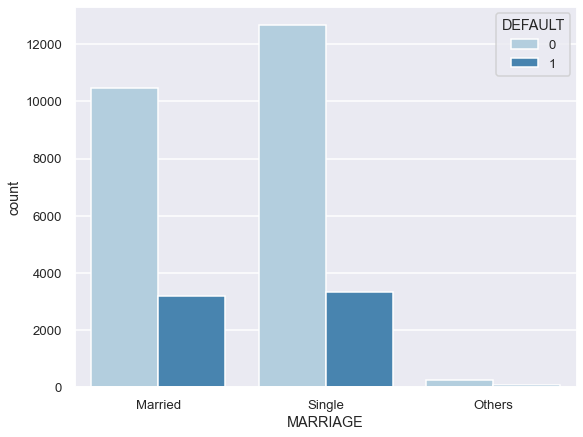

DEFAULT,0,1,percentage
MARRIAGE,,,
1,10453,3206,23.47
2,12672,3346,20.89
3,239,84,26.01


In [22]:
#create bar chart
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

marg = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=dataframe_raw, palette ='Blues')
marg.set_xticklabels(['Married','Single', 'Others'])
plt.show()

#Create table
m_df = dataframe_raw.groupby(['MARRIAGE','DEFAULT'])['DEFAULT'].count().unstack()
m_df['percentage'] = round((m_df[1]/(m_df[0]+m_df[1]))*100,2)
m_df

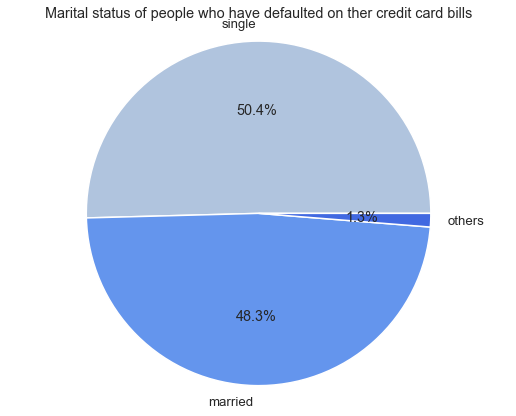

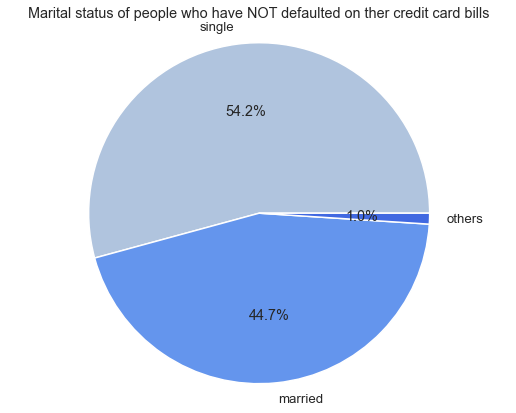

In [23]:
# Fraction of married people among those who have defaulted
marital_status=['single','married','others']
ocurrence=dataframe_raw[dataframe_raw['DEFAULT']==1].MARRIAGE.value_counts().values
plt.pie(ocurrence,labels=marital_status,autopct='%1.1f%%',colors=['lightsteelblue','cornflowerblue','royalblue'])
plt.title('Marital status of people who have defaulted on ther credit card bills')
plt.axis('equal')
plt.show()

# Fraction of married people among those who have NOT defaulted
incidence=dataframe_raw[dataframe_raw['DEFAULT']==0].MARRIAGE.value_counts().values
plt.pie(incidence,labels=marital_status,autopct='%1.1f%%',colors=['lightsteelblue','cornflowerblue','royalblue'])
plt.title('Marital status of people who have NOT defaulted on ther credit card bills')
plt.axis('equal')
plt.show()

Married clients have a higher chance of defaulting than single clients. The other category single has the highest probability of default.

### Explore Age with Default Data
Let's look the ages into groups which would make it easier to look at the plots.

<AxesSubplot:xlabel='AGE', ylabel='Density'>

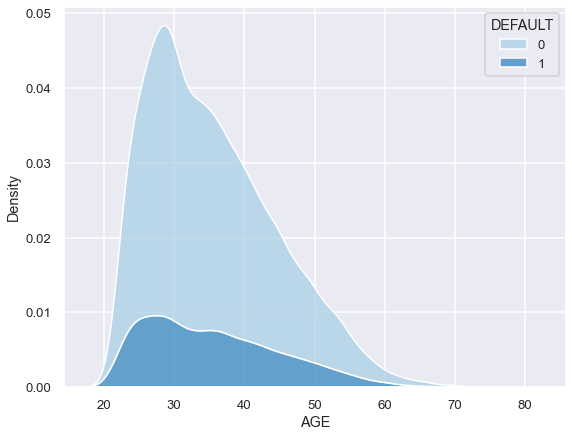

In [24]:
sns.kdeplot(data=dataframe_raw, x="AGE", hue="DEFAULT", multiple="stack", palette ='Blues')

Younger customers have fewer chances of defaulting and older customers have a higher probability. But category of 70 and 80 are quite extraneous.

Let's take a look at the limits provided for various age groups, maybe this can clear out or give some sense to the results we are observing.

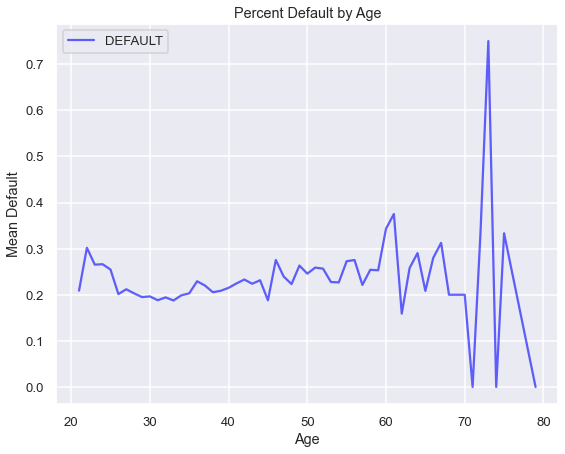

In [25]:
#mean default by age
default_by_age=pd.DataFrame(dataframe_raw.groupby(['AGE'])['DEFAULT'].mean())
default_by_age.plot(title='average default by age', color = 'blue', alpha = 0.6)
plt.ylabel('Mean Default')
plt.xlabel('Age')
plt.title('Percent Default by Age')
plt.show()

Text(0.5, 1.0, 'Limit Balance by Age')

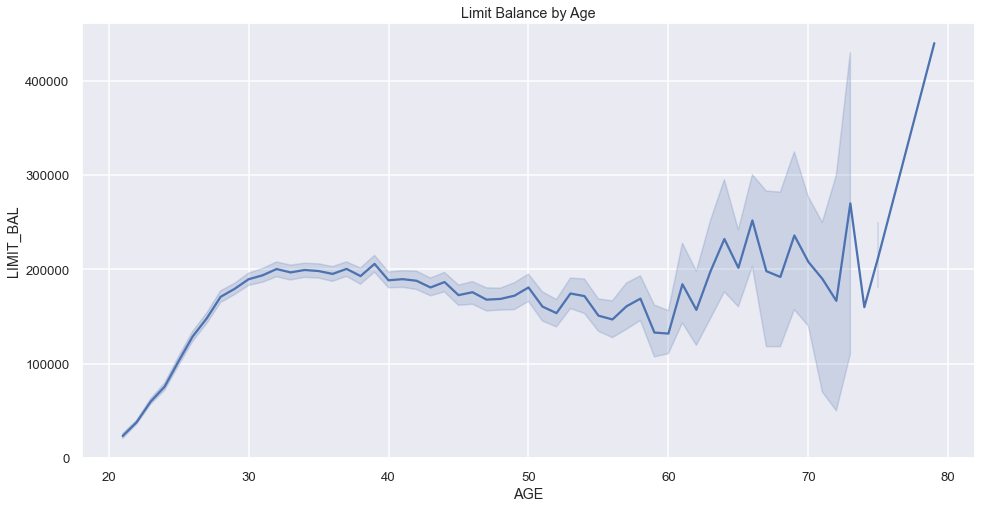

In [26]:
#dataframe_raw.groupby(['AGE'])['LIMIT_BAL'].mean()
plt.figure(figsize=(16,8))
sns.lineplot(x= 'AGE', y='LIMIT_BAL',data=dataframe_raw, palette ='Blues') 
plt.title('Limit Balance by Age')

 From the charts above we see that the default rate was markedly lower for people under 60 compared to people above 60 years old. The default rate was around 30 % for people above 60 years old and only about 20 % for people below 60. As credit limit also higher for above 60 years old. 

 Younger customers have lower limits credit, and they don't default as much as the older customers.
 
 
 ## Final Democratic OBSERVATION
 
 * Range of 25-40 years old cliends have a slightly lower chance of default
 * Male and female have a very small affect on whether or not client will default payment next month. But male clients tend default payment.
 * Single customers have a slightly lower change of default patment than married or other.
 * Higher education have a lower chance of defaulting.

## Explore Credit Behaviour

### Explore Limit Balanca with Default
LIMIT_BAL corresponds to the given credit of both the card holder and its family members. Normally, those with good credit score, higher income, and more assets are granted a higher credit card limit.



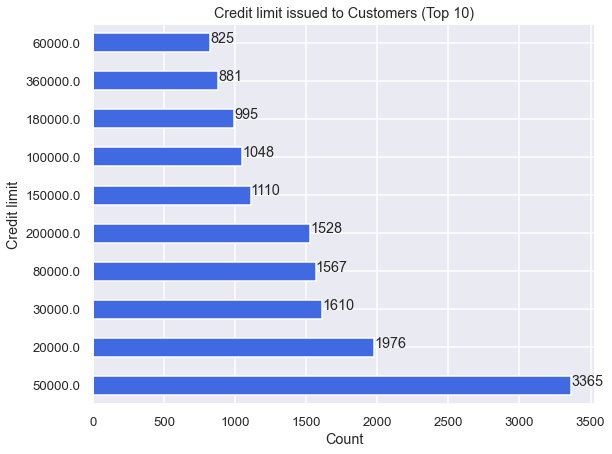

In [27]:
#count each bar total numeric
def drawCountOnBar(axes, orient = "v"):
    for p in axes.patches:
        if orient == "v":
            height = p.get_height()
            axes.text(x = p.get_x()+p.get_width()/2., y = height + 1 ,s = height ,ha="center")
        else:
            width = p.get_width()
            axes.text(x = p.get_x() + width, y = p.get_y() + p.get_height()/2 ,s = width ,ha="left")
#creat column chart             
column = 'LIMIT_BAL'
limit_Balance_Counts = dataframe_raw[column].value_counts()

axes = limit_Balance_Counts.nlargest(n=10).plot(kind='barh', title='Credit limit issued to Customers (Top 10)', color='royalblue')
axes.set_xlabel('Count')
axes.set_ylabel('Credit limit')
drawCountOnBar(axes, orient = "h")

There are more customer who has 50000NT dollars as the limit which is almost twice than the number of customers having limit as 20000 dollars

Text(0.5, 1.0, 'Limit Balance by DEFAULT')

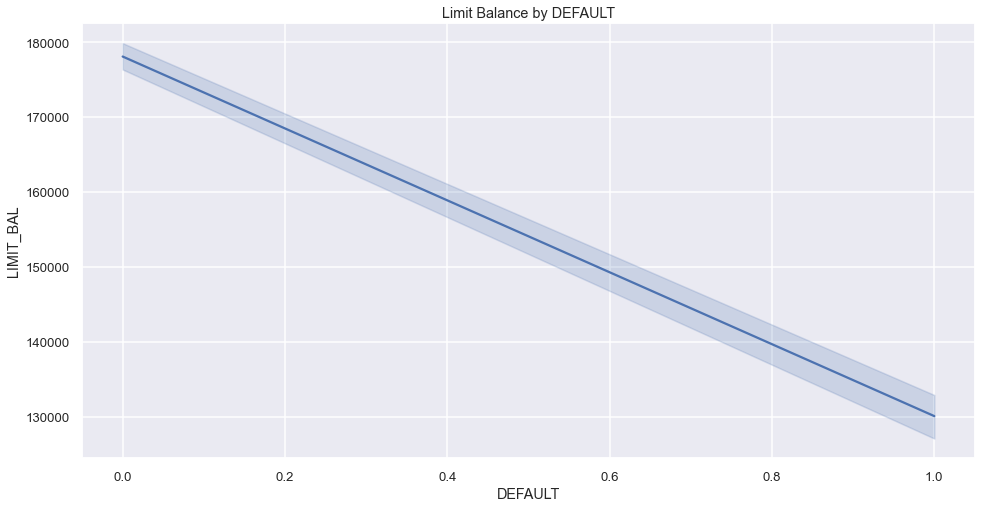

In [28]:
#dataframe_raw.groupby(['DEFAULT'])['LIMIT_BAL'].mean()
plt.figure(figsize=(16,8))
sns.lineplot(x= 'DEFAULT', y='LIMIT_BAL',data=dataframe_raw, palette ='Blues') 
plt.title('Limit Balance by DEFAULT')

Credit limit has a negative relation with Default, means highest credit limit lowest default peymant status.

Text(0.5, 1.05, 'Limit Balance and Default Rate Distribution')

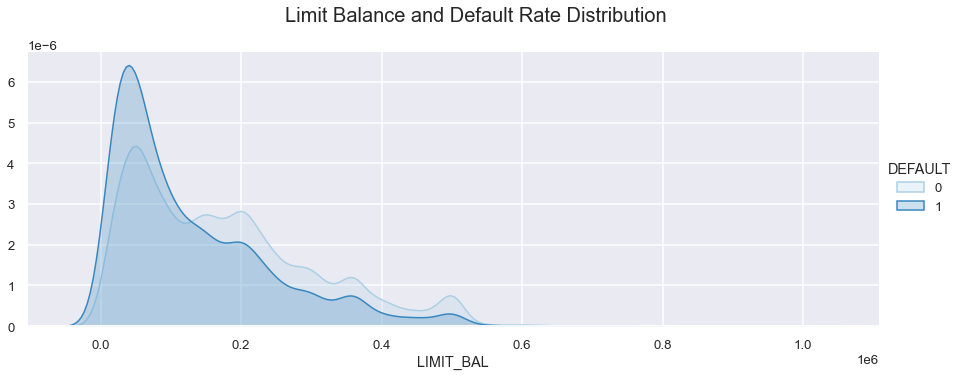

In [29]:
# Limit Balance and Default Rate Distribution
limit_bal = sns.FacetGrid(dataframe_raw, hue = 'DEFAULT', aspect = 2.5, height= 5, palette = 'Blues')
limit_bal.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
limit_bal.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

It seems like those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default.

### Create a Boxplot with and without Outliers of Credit Limit by Martial status, Gender and Education
More commonly, the outlier affects both results and assumptions. In this situation, it is not legitimate to simply drop the outlier.We may run the analysis both with and without it, but we should state in at least a footnote the dropping of any such data points and how the results changed.

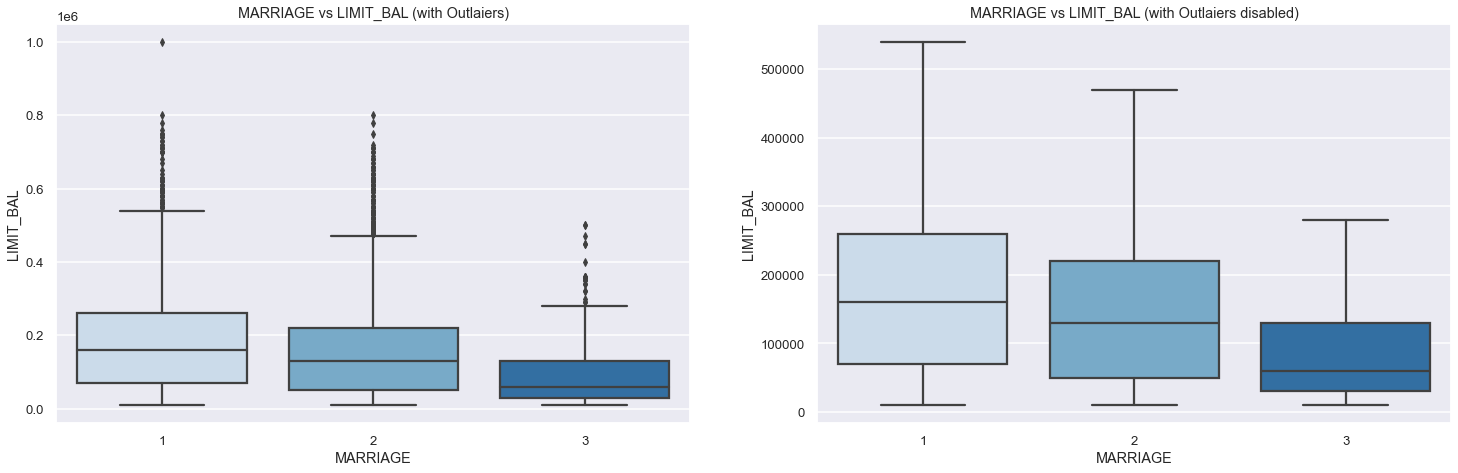

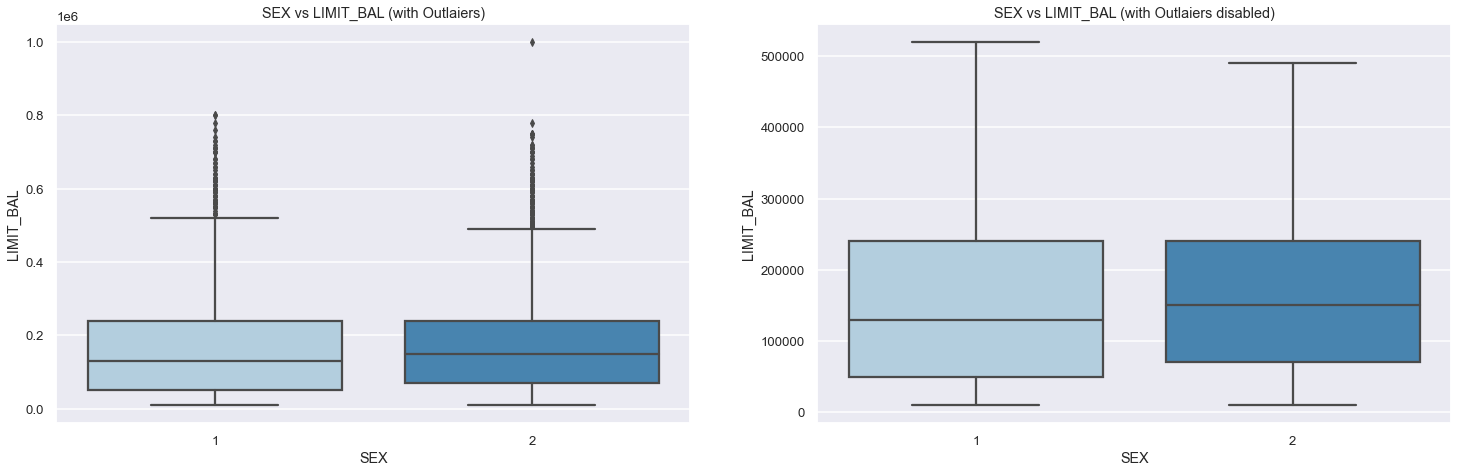

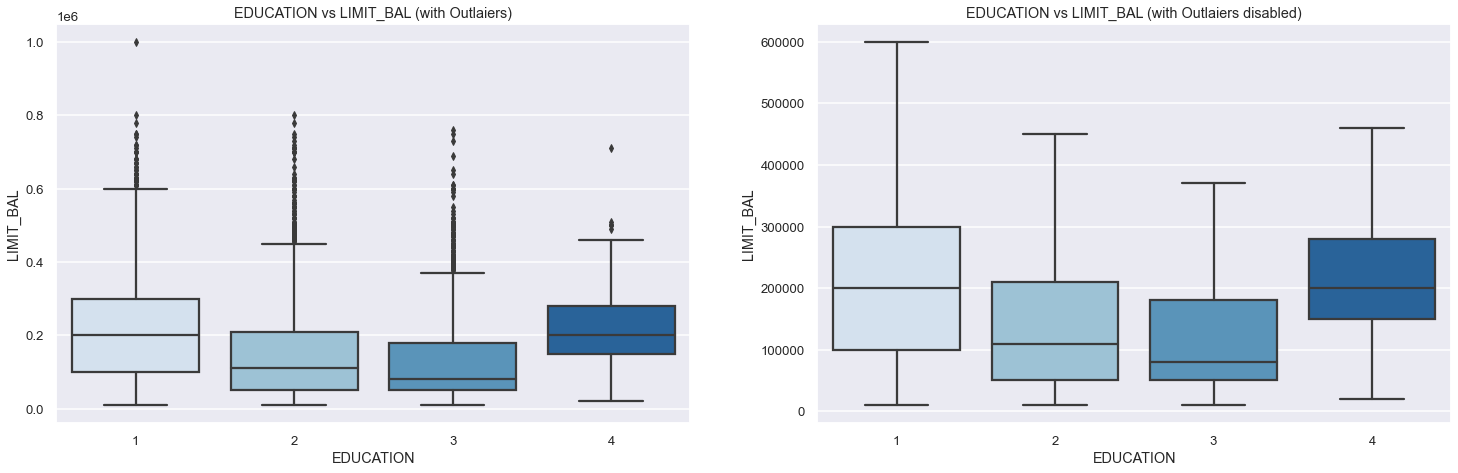

In [30]:
#creat box plot with for loop
axs = 1
for i in ['MARRIAGE', 'SEX', 'EDUCATION']:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,axs)
    sns.boxplot(data=dataframe_raw, y='LIMIT_BAL', x=i, palette = 'Blues')
    plt.title(i + ' vs LIMIT_BAL (with Outlaiers)')
    
    plt.subplot(3,2,axs+1)
    sns.boxplot(data=dataframe_raw, y='LIMIT_BAL', x=i, showfliers=False, palette = 'Blues')
    plt.title(i + ' vs LIMIT_BAL (with Outlaiers disabled)')
    axs += 2

plt.show()

when drop outliers values and each variables' avarage, max, and min change it. As a result, outlier affect final result and we can't remove it from the data.

### Credit Limit Observation

**Married** customers are having more credit limit.<br>
**Gender** don't seem to have much impact on credit limit<br>
Customers with **EDUCATED** (1) and OTHERS (4) class are having higher credit limit.

### Explore PAY_  by Default Data

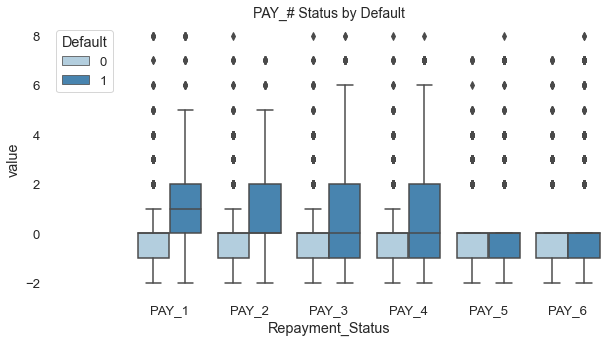

In [31]:
Repayment = dataframe_raw[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
y = dataframe_raw['DEFAULT']
Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="DEFAULT",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="DEFAULT", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('PAY_# Status by Default', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

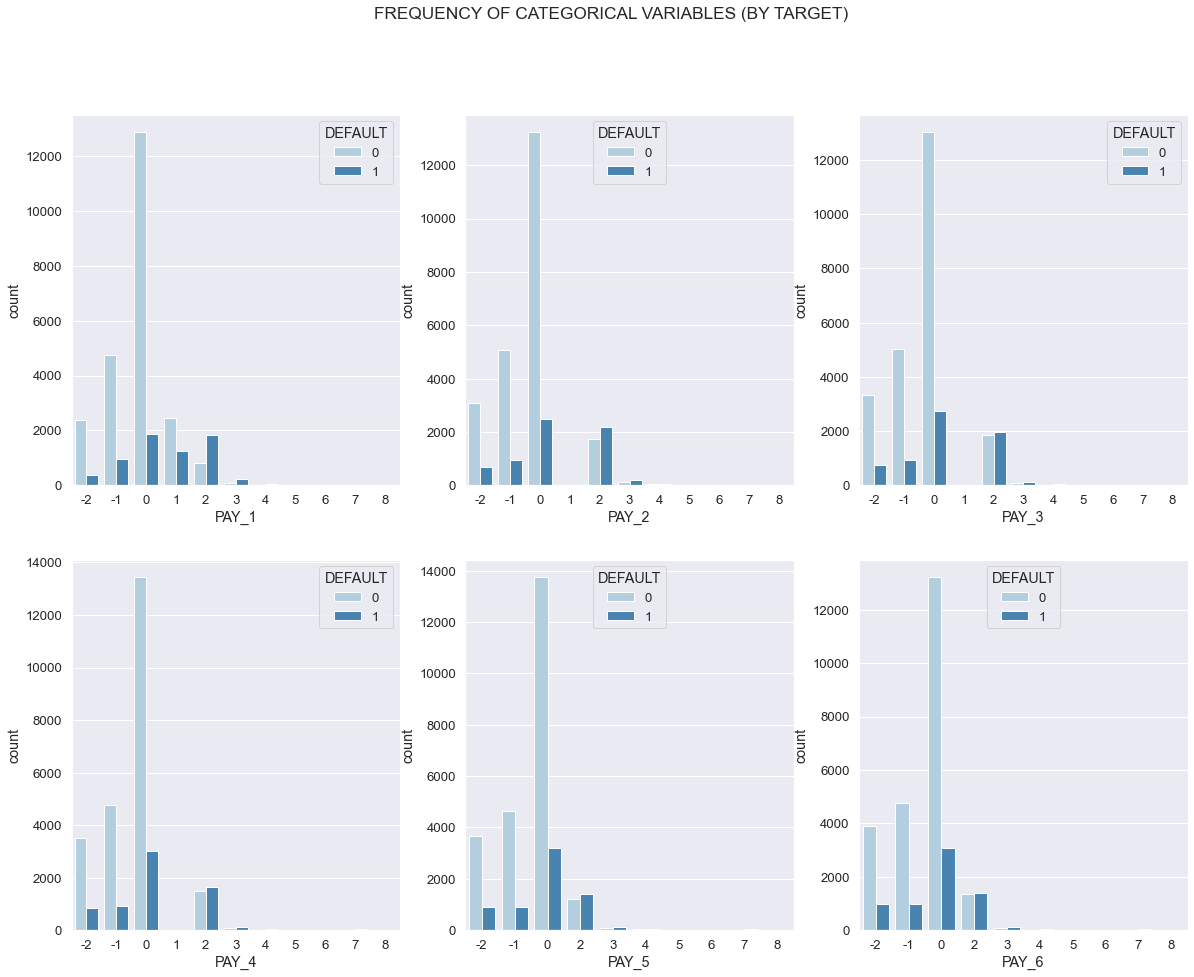

In [32]:
# Creating a new dataframe with categorical variables
subset = dataframe_raw[[ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'DEFAULT']]

f, axes = plt.subplots(2, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax4 = sns.countplot(x="PAY_1", hue="DEFAULT", data=subset, palette="Blues", ax=axes[0,0])
ax5 = sns.countplot(x="PAY_2", hue="DEFAULT", data=subset, palette="Blues", ax=axes[0,1])
ax6 = sns.countplot(x="PAY_3", hue="DEFAULT", data=subset, palette="Blues", ax=axes[0,2])
ax7 = sns.countplot(x="PAY_4", hue="DEFAULT", data=subset, palette="Blues", ax=axes[1,0])
ax8 = sns.countplot(x="PAY_5", hue="DEFAULT", data=subset, palette="Blues", ax=axes[1,1])
ax9 = sns.countplot(x="PAY_6", hue="DEFAULT", data=subset, palette="Blues", ax=axes[1,2]);

It seems that PAY_1 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power the repayment status in other months.Each month, paid minimum only(0) has a lower chance default, but late 2 month(2) repayment tend to default.
Let's check monthly behaviour data.

### Explore BILL_AMT Data 

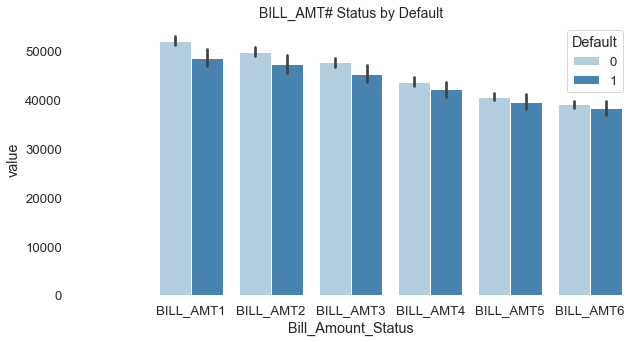

In [33]:
Repayment = dataframe_raw[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
y = dataframe_raw['DEFAULT']
Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="DEFAULT",
                    var_name="Bill_Amount_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.barplot(y="value", x="Bill_Amount_Status", hue="DEFAULT", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('BILL_AMT# Status by Default', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

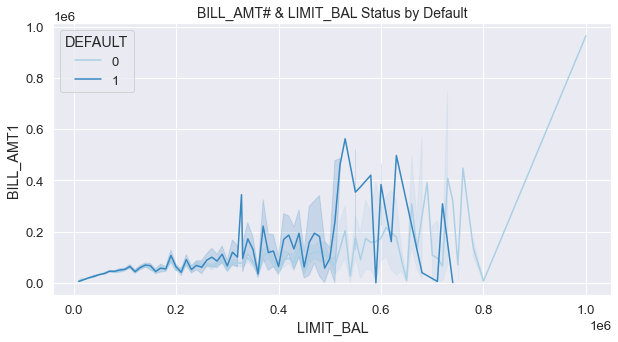

In [34]:
plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
bill_limit=sns.lineplot(x='LIMIT_BAL',y="BILL_AMT1", hue='DEFAULT', data=dataframe_raw, palette='Blues')

plt.title('BILL_AMT# & LIMIT_BAL Status by Default', size=14)
plt.savefig('ImageName', format='png', dpi=200);

'BILL_AMT#' also shows similar trends like "PAY_#".  Highest Bill Amount above 1M and lowest one approximantely -2T from September 2005.
Let's look at the "PAT_AMT#'

## Explore PAY_AMT Data

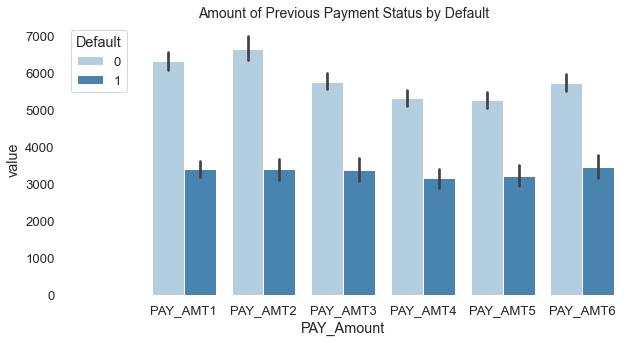

In [35]:
Repayment = dataframe_raw[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = dataframe_raw['DEFAULT']
Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="DEFAULT",
                    var_name="PAY_Amount",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.barplot(y="value", x="PAY_Amount", hue="DEFAULT", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('Amount of Previous Payment Status by Default', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

Amount of previous payment;PAY_AMT# has a same average for each month, that is not so affect to default. Let's check highest amount repayment month as September.

### Pay_1 data (September, 2005)

PAY_1: Repayment status in September, 2005 (most recent month)

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

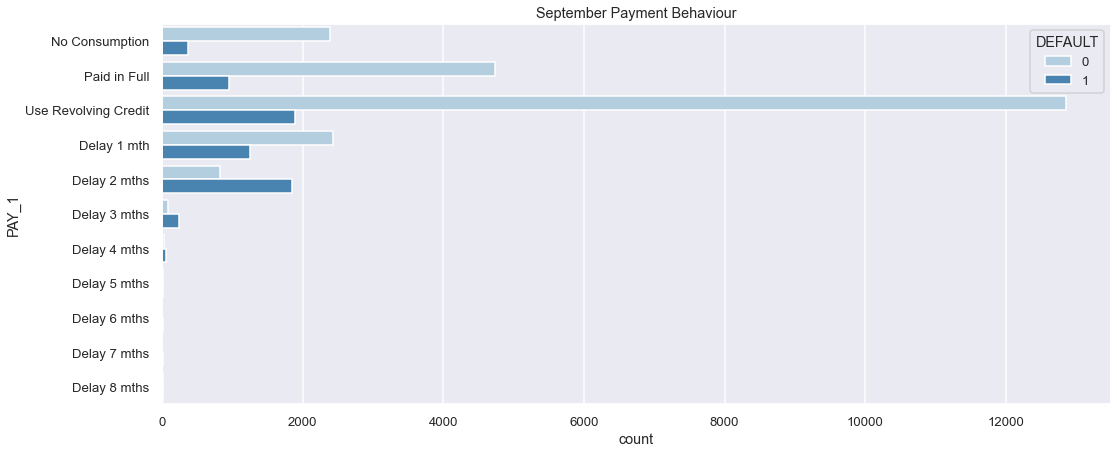

In [36]:
sns.set(rc={'figure.figsize':(17,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=dataframe_raw, palette='Blues')
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('September Payment Behaviour')

plt.show()

In [37]:
default0 = dataframe_raw.groupby(dataframe_raw['PAY_1'][dataframe_raw['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = dataframe_raw.groupby(dataframe_raw['PAY_1'][dataframe_raw['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = dataframe_raw.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table

,PAY_1,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2394,365,2759
1,Paid in Full,4732,954,5686
2,Use Revolving Credit,12849,1888,14737
3,Delay 1 mth,2436,1252,3688
4,Delay 2 mths,823,1844,2667
5,Delay 3 mths,78,244,322
6,Delay 4 mths,24,52,76
7,Delay 5 mths,13,13,26
8,Delay 6 mths,5,6,11
9,Delay 7 mths,2,7,9


## OBSERVATION
Those Using Revolving Credit (paid only minimum) and those delayed for 2 months have the highest Default Count.
When payment is delayed more than 2 months, the chances of default goes higher than 50%.

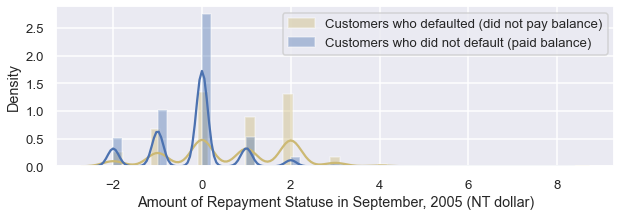

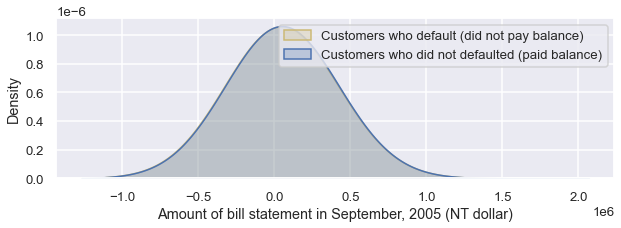

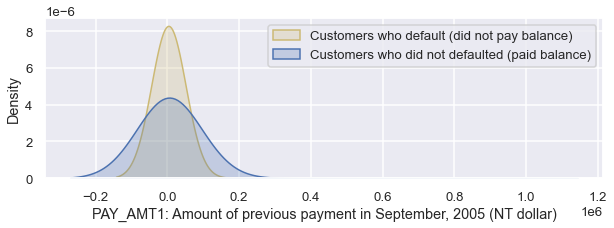

In [38]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 
import warnings
warnings.filterwarnings('ignore')
sns.set_color_codes()
#Creat new to list default and notdefault payment 
default = dataframe_raw[dataframe_raw['DEFAULT']==1]
notdefault = dataframe_raw[dataframe_raw['DEFAULT']==0]
#creat distplot to compared to repayment status by default value
plt.figure(figsize=(10,10));
plt.subplot(311);
sns.distplot(default['PAY_1'], color='y', label='Customers who defaulted (did not pay balance)');
sns.distplot(notdefault['PAY_1'], color='b', label = 'Customers who did not default (paid balance)');
plt.xlabel('Amount of Repayment Statuse in September, 2005 (NT dollar)');
plt.legend() #when legend doesn't display it I add legend and show function to shows legend
plt.show()
#creat distplot to compared to bill amount by default value
plt.figure(figsize=(10,10));
plt.subplot(312);
sns.kdeplot(default['BILL_AMT1'], label = 'Customers who default (did not pay balance)', shade = True, color = 'y', legend=True, bw=5);# bw shows variance if put small number will increase variance number
sns.kdeplot(notdefault['BILL_AMT1'], label = 'Customers who did not defaulted (paid balance)', shade = True, color = 'b', bw=5);

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)');
plt.legend()
plt.show()
#creat distplot to compared to previous payment by default value
plt.figure(figsize=(10,10));
plt.subplot(313);
sns.kdeplot(default['PAY_AMT1'], label = 'Customers who default (did not pay balance)', shade = True, color = 'y', legend=True, bw=5);
sns.kdeplot(notdefault['PAY_AMT1'], label = 'Customers who did not defaulted (paid balance)', shade = True, color = 'b', bw=5);
plt.xlabel('PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)');
plt.legend()
plt.show()

-What each plot telling, Fist plot about 'PAY_1' repayment status; there are 6 peak and highest peak destiny on-time repayment status('PAY_1'= 0 with 'DEFAULT'=0). First 3 peak has a highest repayment after the 0=on-time peak exchanged highest is default lowest one is nondefault.<br>
-Second, amount of bill statement 'BILL_AMT#'; there is a one peak, and default and nondefault variables are closely same.<br>
-Third, amount of previous payment 'PAY_AMT#'; there is a one peak, and default destiny higher than nondefault payment. 

## Visualize with Heatmap

<font color=green>Correlations between all variables.</font> 



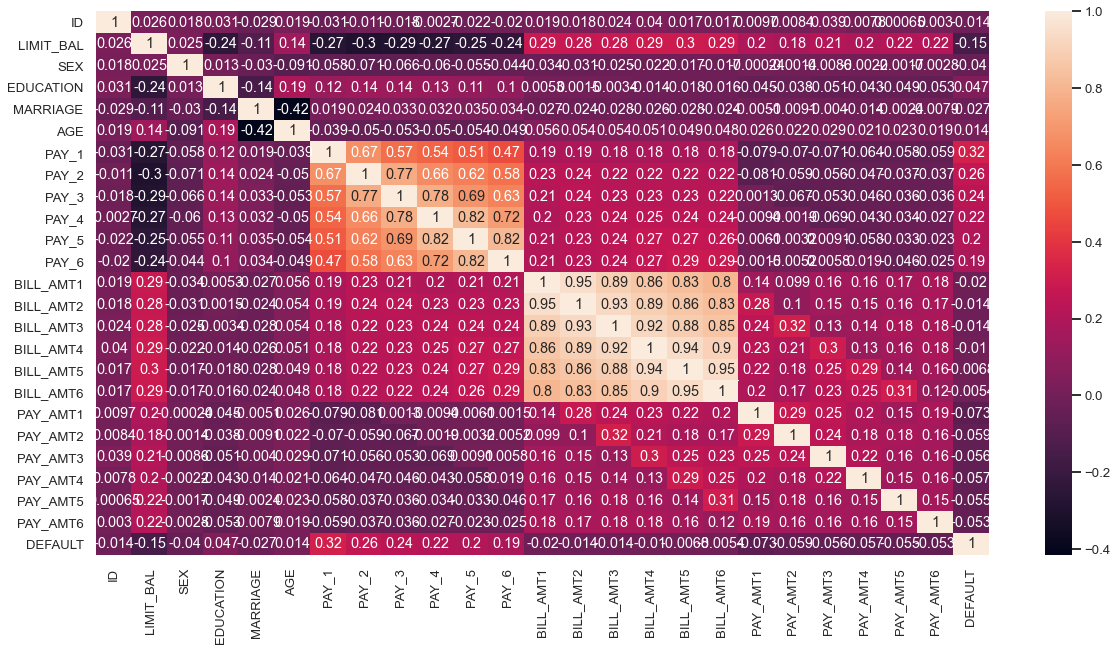

In [39]:
corr = dataframe_raw.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()


All variables don't have a strong correlation with the defaulting chance of the customer. <br>
**'PAY_'** variables have a small amount of positive corelation with 'DEFAULT' as 'PAY_1' is 0.37 higest one means **longer period of delay payment, higher default** and stronger correlation themselves means **client's payment behavior highly affects to the default payment**. <br>
**'BILL_AMT** variables have a strong positive correlation themselves, but ther is a weak correlaion between 'PAY_'.<br>
**'LIMIT_BAL'** has a positive corelation with 'BILL_AMT' but a negative corellation with 'PAY_AMT', 'PAY_' and 'DEFAULT'.<br> 
**'AGE' and 'MARRIAGE'** have a strongest negative correlation which means younger customer might be single and older ones might be married. 
Let's take a look deeper and deeper.

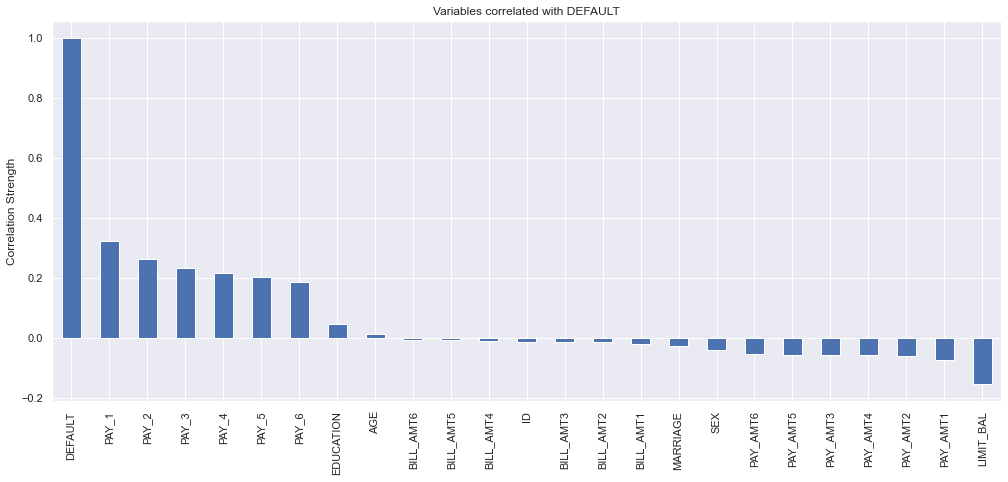

In [40]:
sns.set(rc={'figure.figsize':(17,7)})
corr = corr.sort_values("DEFAULT", ascending=False)
corr['DEFAULT'].plot(kind='bar')
plt.title("Variables correlated with DEFAULT")
plt.ylabel("Correlation Strength")
plt.show()

**PAY_#** has the highest correlation values than other variable. Also Education and Age has a positive corelation.
**LIMIT of credit balance** has highest negative correlation.

## Creating a Multivariate Regression Model

The best way to predict if a cardholder is likely to default on their credit card is to test different algorithms. The algorithms I will be using to test which will perform the best on determining credit card default is:<br>
*Random Forest<br>
*RFE(Recursive Feature Elimination)<br>
*Logistic Regression(Orginal data)<br>
*Logistic Regression(Standardized data)<br>
*Logistic Regression(important features)<br>
*ROC(Receiver Operating Characteristic)<br>
The best model should also be able to predict the test set with at least 80% accuracy.

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, \
recall_score, confusion_matrix, classification_report, \
accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA



RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = True

## The Random Forests Algorithm
First let's look at the which value is important and which vlues should use model with **Random Forests Classifiers**.This algorithm score will help you choose the most important features and drop the least important ones for model building.The random forest algorithm randomly selects observations and features to build several decision trees and then averages the results.<br>
The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.**In bagging**, we reduce the variance of model by generating additional test data.Once the size of the data set is increased, we can tune the model to be more immune to variance<br>
-First, we need to create a random forests model.<br>
-Second, use the feature importance variable to see feature importance scores.<br>
-Third, visualize these scores using the seaborn library.<br>

**DATA CLEANING, STANDARDIZING AND TRAIN & TEST SPLIT**
Assign Dependent Variable (Target) into y.<br>
Assign one or multiple Independent Variable (Predictor) into X.<br>
In first example, we use all explanatory variable, excluding ID which give no meaning.

In [42]:
#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#train_df, val_df = train_test_split(dataframe_raw, test_size=0.20, random_state=2018, shuffle=True )
# creat target value and predictors list
y = dataframe_raw['DEFAULT']  
X = dataframe_raw[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2018, shuffle=True ) # 70% training and 30% tes
##creat MinMaxScaler for F1 and Recall
from sklearn.preprocessing import MinMaxScaler
mms_xtrain = MinMaxScaler().fit_transform(X_train)
mms_xtest = MinMaxScaler().fit_transform(X_test)

Metrics = pd.DataFrame({'F1':[],'Recall':[]})

## Precision, Accuracy, Recall and R1

We will use metrics such as Precision, Recall, F1 Scores and Logarithmic Loss to compare the models. To visualize the results we will make use of line plots and confusion matrix. The plots will help us choose the optimum parameter and confusion matrix will help us to calculate the F1 score. The confusion matrix will also give us the number of predictions with their respective true and predicted label.<br>
    precision =(TP)/(TP+FP) Precision: Out of all the predicted positive instances, how many were predicted correctly.<br>
    accuracy_model  =(TP+TN)/(TP+TN+FP+FN)<br>
    recall_score  =(TP)/(TP+FN) Recall: Out of all the positive classes, how many instances were identified correctly.<br>
    specificity_value =(TN)/(TN + FP)<br>
     
    False_positive_rate =(FP)/(FP+TN)
    False_negative_rate =(FN)/(FN+TP)

In [43]:
def accplots(param,predict,train,xlabel):
    plt.plot(param,predict,'y')
    plt.plot(param,train,'b')
    plt.title('Variation Of F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('F1 Score')
    plt.legend(('Prediction','Train'))
def cfmatrix(ytest,ypredict,title):
    cfm = confusion_matrix(ytest,ypredict,labels=[0,1])
    sns.heatmap(cfm,annot=True,fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

I will predominantly make use of recall and F1 scores for evaluating the model. The reason why I'm focusing on these metrics is that they are of the most importance to us. Let me elaborate by connecting this with our problem.<br>

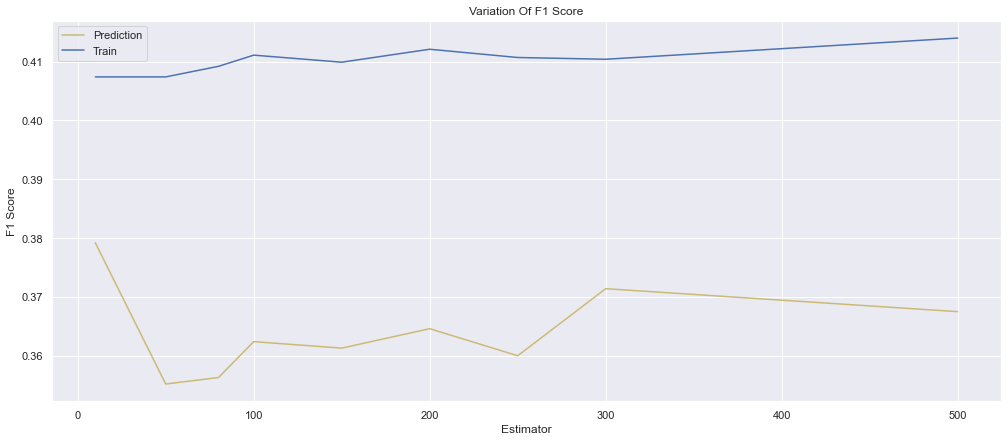

In [44]:
estimators,score_train,score_predict = [10,50,80,100,150,200,250,300,500],[],[]
for est in estimators:
    rfc = RandomForestClassifier(n_estimators=est,criterion='entropy',max_depth=5,random_state=10)
    rfc.fit(mms_xtrain,y_train)
    y_ptrain = rfc.predict(mms_xtrain)
    y_predict = rfc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))

accplots(estimators,score_predict,score_train,'Estimator')

From the plot it's evident that F1 scores first decrease, then increase when estimators is set as 100 and decrease- increase again. We will use estimators set to 300 for further analysis.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250,300],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)
print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 7, 'criterion': 'entropy'}


Accuracy: 0.827

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4708
           1       0.69      0.36      0.47      1292

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000


Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0093


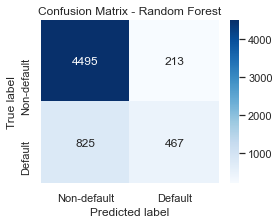

In [46]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 300, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

When banks predict the probability of default, they need the predictions to be very accurate. What I mean by this is, if a customer actually defaults, the model should accurately predict this outcome. So, we need the True positive(actual:1,predicted:1) predictions to be high in number and False negatives(actual:1,predicted:0) to be low in number. Since defaults cost highly to the banks and cause a high level of risk. Since recall is the ratio of true positives and the sum of true positives and false negatives, we need it to be as large as possible.<br>

But if our model predicts some '0' labels as '1', that is allowable. Since this wrong prediction isn't as costly to the banks. Therefore a high precision of the model isn't our top priority. Precision is the ratio of true positives and the sum of true positives and false positives.<br>
This model generates a decent F1 score and recall is 0.36 that looks ok for features importance.

Text(0, 0.5, 'Feature Importance Score')

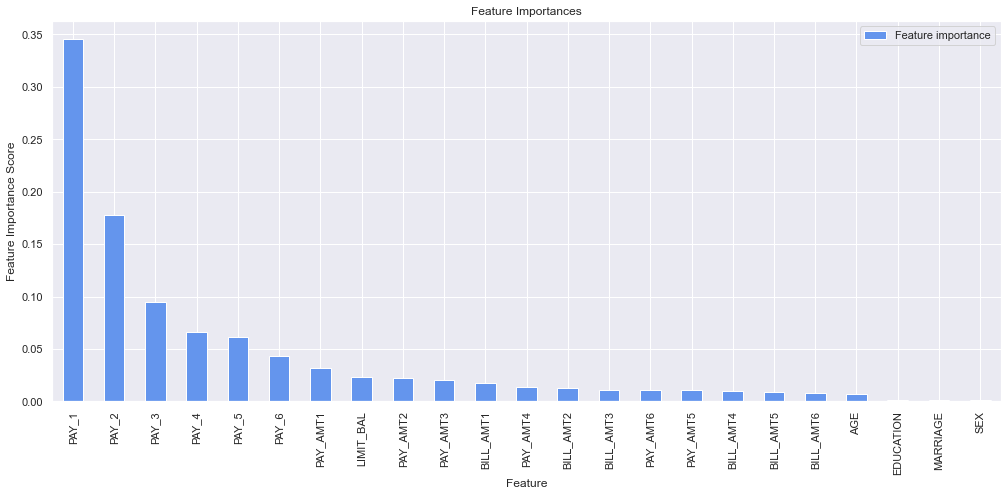

In [75]:
#Let's also visualize the features importance.
cols = X.columns.tolist()
tmp = pd.DataFrame({'Feature': cols, 'Feature importance': Ran.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
# Creating a bar plot
tmp.plot(x='Feature', y='Feature importance',kind='bar', title='Feature Importances', color='cornflowerblue')
plt.ylabel('Feature Importance Score')



In [74]:
tmp

,Feature,Feature importance
5,PAY_1,0.345573
6,PAY_2,0.177372
7,PAY_3,0.094439
8,PAY_4,0.066394
9,PAY_5,0.061168
10,PAY_6,0.043168
17,PAY_AMT1,0.031660
0,LIMIT_BAL,0.022825
18,PAY_AMT2,0.022116
19,PAY_AMT3,0.020570


Burda sort yapiyosun

Random forest is a predictive modeling tool and not a descriptive tool.Random forests are also very hard to beat performance wise. Of course, you can probably always find a model that can perform better, like a neural network for example, but these usually take more time to develop, though they can handle a lot of different feature types, like binary, categorical and numerical.

### OBSERVATION
The most important features are PAY_1, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.<br>
Let's remove the 'SEX', 'MARRIAGE' and 'EDUCATION" feature because it has very low importance.

## Recursive Feature Elimination (RFE)

**DATA CLEANING, STANDARDIZING AND TRAIN & TEST SPLIT**

let's now split the dataset into training and testing dataset using the train_test_split() function. First create standardized features dataset, and second most importand features dataset.

In [48]:
# Dataset with standardized features
from sklearn.feature_selection import RFE
features = dataframe_raw.drop('DEFAULT', axis = 1, inplace = False)
stdX = (features - features.mean()) / (features.std())
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,
                                                               random_state=42)

Here, X is the training dataset that contains all the variables except the response/target value, and y refers to the testing dataset which contains only the response variable.

**Feature Selection**
**Recursive Feature Elimination**
 (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [49]:
from sklearn.feature_selection import RFE
NUM_FEATURES = 3
model = LogisticRegression()
rfe_stand = RFE(model, NUM_FEATURES)
fit_stand = rfe_stand.fit(stdX, y)
feature_names = np.array(features.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Most important features (RFE): ['PAY_1' 'BILL_AMT1' 'PAY_AMT2']


Text(0, 0.5, 'Feature Selection Recursive Feature Elimination of Default')

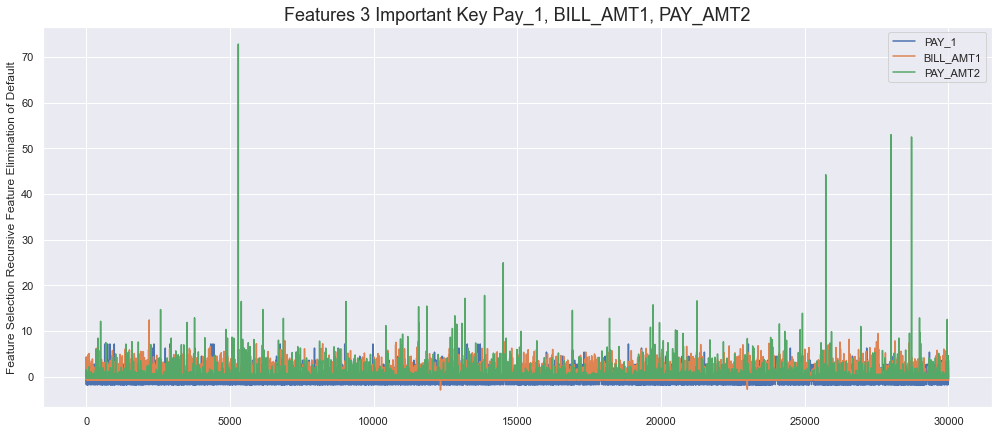

In [50]:
# Dataset with three most important features
Ximp = stdX[['PAY_1', 'BILL_AMT1', 'PAY_AMT2']]
Ximp_train, Ximp_test, yimp_train, yimp_test = train_test_split(Ximp,y, test_size=0.2, stratify=y, random_state=42)
 

Ximp.plot()
plt.title('Features 3 Important Key Pay_1, BILL_AMT1, PAY_AMT2',fontsize=18)
plt.ylabel("Feature Selection Recursive Feature Elimination of Default")

Contrasting both normal and abnormal behaviour through visualisation methodologies resulted in three(3) variables that experienced a notable change in frequency when associated with Default; PAY_1, BILL_AMT1 and PAY_AMT2. Additional PAY_AMT2 has a 4 higest peak may make higest default payment.

### Logistic Regression for Original data
Now, before moving towards the model building, let us define the error metrics which would help us analyze the model in a better manner.<br>
**Logistic Regression** is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter **C** controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.<br>

The parameter ‘C’ was tuned using RandomizedSearchCV( ) for the different datasets: original, standardized and with most important features. Once the parameter ‘C’ was defined for each dataset, the logistic regression model initiated and then fitted to the training data, as it was described in the methodology.<br>
Here, we have created a Confusion Matrix and have calculated the Precision, Recall, Accuracy, and F1 score as well.

In [51]:
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


Accuracy: 0.7848333333333334

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4708
           1       1.00      0.00      0.00      1292

    accuracy                           0.78      6000
   macro avg       0.89      0.50      0.44      6000
weighted avg       0.83      0.78      0.69      6000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


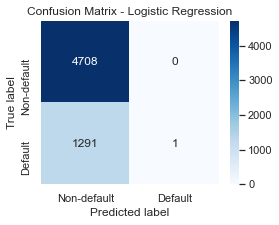

In [52]:
LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

The precision and recall for '0' label are very low but it's the complete opposite for '1' label. This may be due to an imbalanced dataset. But we will tackle this problem after finding a couple of models which will give us a decent result.
The model has not power predicting default credit cards. However, it can be observed that the average accuracy of the model is about 78%, which demonstrates that this metrics is not appropriate for the evaluation of this problem.

## Logistic Regression for Standardized features

In [53]:
# Instantiate the RandomizedSearchCV object:
logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

# Print the tuned parameters 
print("Tuned Logistic Regression Parameters with standardized features: {}".format(logreg_cv_std.best_params_)) 

Tuned Logistic Regression Parameters with standardized features: {'C': 3.727593720314938}


Accuracy: 0.8081666666666667

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Average 5-Fold CV Score: 0.8095 , Standard deviation: 0.0046


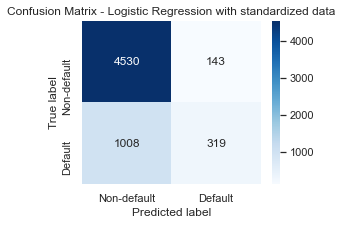

In [54]:
LRS = LogisticRegression(C=3.73, random_state=0)
LRS.fit(Xstd_train, ystd_train)
y_pred = LRS.predict(Xstd_test)
print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LRS, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(ystd_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ystd_test,LRS.predict(Xstd_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

The performance of the logistic regression model standardized data improved compared to the model built with the original dataset. The recall for the positive label is very low and that is not a good sign. Since predicting an actual default as not a default, maybe very costly for the bank. But the model has a decent precision.

## Logistic Regression for most important features

Accuracy: 0.8121666666666667

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.27      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000


Average 5-Fold CV Score: 0.8118 , Standard deviation: 0.0065


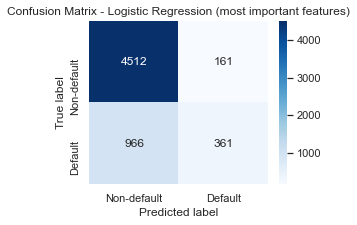

In [55]:
LR_imp = LogisticRegression(C=3.73, random_state=0)
LR_imp.fit(Ximp_train, yimp_train)
y_pred = LR_imp.predict(Ximp_test)
print('Accuracy:', metrics.accuracy_score(y_pred,yimp_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR_imp, Ximp, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(yimp_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(yimp_test,LR_imp.predict(Ximp_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression (most important features)");

When using just important features for building the model, there is a slight improvement in performance with respect to the previous model. Therefore, taking into account three features only, the model has the same predictive power than using 24 features. Thus, future strategies should be focused on: repayment status in September (PAY_1), amount of bill statement in September (BILL_AMT1), and amount of previous payments in August (PAY_AMT2). But still recall is very low, I don't think we can consider this model for further analysis.

### Modelling with single independent variable

Accuracy: 0.8265555555555556

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.71      0.33      0.45      1942

    accuracy                           0.83      9000
   macro avg       0.78      0.65      0.67      9000
weighted avg       0.81      0.83      0.80      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


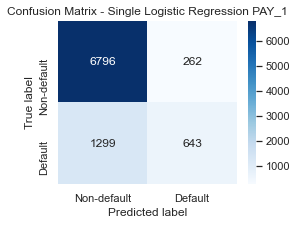

In [56]:
Xsng = dataframe_raw[['PAY_1']]
ysng = dataframe_raw['DEFAULT']

Xsng_train, Xsng_test, ysng_train, ysng_test = train_test_split(Xsng, ysng, test_size=0.3, random_state=101)
SM = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
SM.fit(Xsng_train,ysng_train)

predictions = SM.predict(Xsng_test)
print('Accuracy:', metrics.accuracy_score(predictions,ysng_test))
## 5-fold cross-validation 
cv_scores =cross_val_score(LR, Xsng, ysng, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(ysng_test, predictions))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ysng_test,SM.predict(Xsng_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Single Logistic Regression PAY_1");

### Receiver operating characteristic (ROC) Curve
Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The AUC is the Area Under Curve. If the AUC is high, the model is better distinguishing between positive and negative class. The ROC curve is plotted with “True Positive Rate” or Recall (on the y-axis) against the “False Positive Rate” (on the x-axis). When the AUC is 0.5 means that the model has no discrimination capacity to distinguish between positive and negative class.

The Receiver operating characteristic (ROC) Curve with the respective area under the curve (AUC) are shown below for each model.


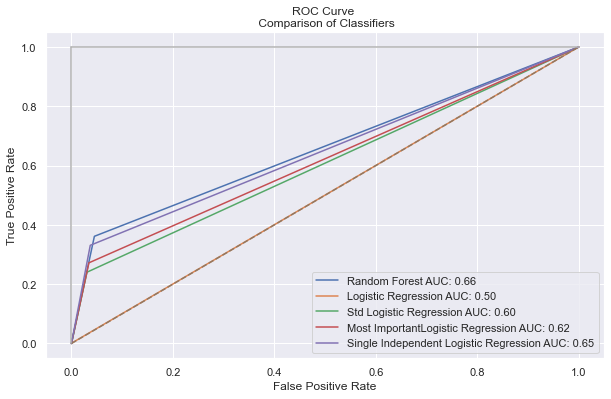

In [57]:

rfc_pred = Ran.predict(X_test)
log_pred = LR.predict(X_test)
LRS_pred = LRS.predict(Xstd_test)
LR_imp_pred = LR_imp.predict(Ximp_test)
SM_pred = SM.predict(Xsng_test)

rfc_fpr, rfc_tpr, rfc_threshold= roc_curve(y_test, rfc_pred)
log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
LRS_fpr, LRS_tpr, LRS_threshold = roc_curve(ystd_test, LRS_pred)
LR_imp_fpr, LR_imp_tpr, LR_imp_threshold = roc_curve(yimp_test, LR_imp_pred)
SM_fpr, SM_tpr, SM_threshold= roc_curve(ysng_test, SM_pred)


# Plot ROC curves
fig = plt.figure(figsize=(10,6))
plt.title('ROC Curve \n Comparison of Classifiers')
plt.plot(rfc_fpr, rfc_tpr, label ='Random Forest AUC: {:.2f}'.format(roc_auc_score(y_test, rfc_pred)))
plt.plot(log_fpr, log_tpr, label ='Logistic Regression AUC: {:.2f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(LRS_fpr, LRS_tpr, label ='Std Logistic Regression AUC: {:.2f}'.format(roc_auc_score(ystd_test, LRS_pred)))
plt.plot(LR_imp_fpr, LR_imp_tpr, label ='Most ImportantLogistic Regression AUC: {:.2f}'.format(roc_auc_score(yimp_test, LR_imp_pred)))
plt.plot(SM_fpr, SM_tpr, label ='Single Independent Logistic Regression AUC: {:.2f}'.format(roc_auc_score(ysng_test, SM_pred)))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability Random Forest's result best one than other model.

## Final Observation
Repayment Status,which shows their delay status, is the most important indicator for Default.<br>
When payment is delayed more than 2 months, the chances of default goes higher than 50%.<br>
High School level have higher chance of Default.<br>
Age range from 25 to 40, have lower Default rate.<br>
Some client who Paid in Full in recent month, turn out to be default.<br>
To lower the risk of default, must be very cautious on clients payment behaviour.<br>
More cautious on Divorce and High School level clients.<br>
Best model for the fetures model is Random Forests Algorithm has higest accuracy(0.83) and recall(0.36) than other models.